In [80]:
import numpy as np
from neuraltda import SLSEMetric as slse
import neuraltda.Annealer as an
reload(an)

<module 'neuraltda.Annealer' from '/home/brad/code/NeuralTDA/neuraltda/Annealer.pyc'>

In [ ]:
myslse = slse.SLSEMetric([], 1, 13.0)

In [ ]:
myslse.error([], 1)

In [2]:
class simplesys:
    
    def __init__(self, center):
        self.center = center
        
    def initialize(self):
        return 100*np.random.randn()
    
    def run(self, s):
        return s
    
class sqloss:
    
    def __init__(self, center):
        self.center = center
        
    def error(self, x):
        return (self.center - x)**2

In [ ]:
sys = simplesys(4)
loss = sqloss(3.5)
annealer = an.Annealer(loss, sys, 0.001)

In [ ]:
annealer.anneal(10000)

In [3]:
import brian2
%matplotlib inline

In [ ]:
start_scope()

eqs = '''
dv/dt = (I-v)/tau : 1
I : 1
tau : second
'''
G = NeuronGroup(3, eqs, threshold='v>1', reset='v = 0', method='linear')
G.I = [2, 0, 0]
G.tau = [10, 100, 100]*ms

# Comment these two lines out to see what happens without Synapses
S = Synapses(G, G, 'w : 1', on_pre='v_post += w')
S.connect(i=0, j=[1, 2])
S.w = 'j*0.2'

M = StateMonitor(G, 'v', record=True)

run(50*ms)

plot(M.t/ms, M.v[0], '-b', label='Neuron 0')
plot(M.t/ms, M.v[1], '-g', lw=2, label='Neuron 1')
plot(M.t/ms, M.v[2], '-r', lw=2, label='Neuron 1')
xlabel('Time (ms)')
ylabel('v')
legend(loc='best');

In [ ]:
start_scope()

N = 25
tau = 10*ms
v0_max = 3.
duration = 4000*ms
sigma = 0.2

eqs = '''
dv/dt = (v0-v)/tau+sigma*xi*tau**-0.5 : 1 (unless refractory)
v0 : 1
'''

G = NeuronGroup(N, eqs, threshold='v>1', reset='v=0', refractory=5*ms, method='euler')
M = SpikeMonitor(G)

G.v0 = 0.7

# Comment these two lines out to see what happens without Synapses
S = Synapses(G, G, 'w : 1', on_pre='v_post += w')
S.connect(p=0.1)
S.w = 'randn()'
S.delay = 1*ms

run(duration)

figure(figsize=(12,4))
subplot(121)
plot(M.t/ms, M.i, '.k')
xlabel('Time (ms)')
ylabel('Neuron index')
subplot(122)
plot(G.v0, M.count/duration)
xlabel('v0')
ylabel('Firing rate (sp/s)');



In [52]:
import pandas as pd
class SpikingNetwork:
    fs = 40000
    N = 25
    tau = 10*brian2.ms
    v0_max = 3.
    duration = 4000*brian2.ms
    sigma = 0.2
    
    def __init__(self):
        brian2.start_scope()
        
        eqs = '''
        dv/dt = (v0-v)/tau+sigma*xi*tau**-0.5 : 1 (unless refractory)
        v0 : 1
        tau : second
        sigma : 1
        '''

        self.G = brian2.NeuronGroup(self.N, eqs, threshold='v>1', reset='v=0', refractory=5*brian2.ms, method='euler')
        self.M = brian2.SpikeMonitor(self.G)

        self.G.v0 = 0.7
        self.G.tau = self.tau
        self.G.sigma=self.sigma
        # Comment these two lines out to see what happens without Synapses
        self.S = brian2.Synapses(self.G, self.G, 'w : 1', on_pre='v_post += w')
        self.S.connect(p=0.1)
        self.S.w = 'randn()'
        self.S.delay = 1*brian2.ms
        
        self.net = brian2.Network()
        self.net.add(self.G, self.M, self.S)
        
    def initialize(self):
        return np.array(self.S.w)
    
    def run(self, weights=None):
        if weights:
            self.S.w = weights
        self.net.run(self.duration)
        sptrains = self.M.spike_trains()
        spikes = pd.DataFrame(data={'cluster': self.M.i, 'time_samples': np.int_(np.array(self.M.t)*self.fs), 'recording': len(self.M.t)*[0]})
        spikes = spikes.sort(columns='time_samples')
        stim_trials = pd.DataFrame(data={'time_samples': [0], 'stimulus_end': [float(self.duration)]})
        clusters_list = range(self.N)
        
        return spikes

In [11]:
def visualise_connectivity(S):
    Ns = len(S.source)
    Nt = len(S.target)
    figure(figsize=(10, 4))
    subplot(121)
    plot(zeros(Ns), arange(Ns), 'ok', ms=10)
    plot(ones(Nt), arange(Nt), 'ok', ms=10)
    for i, j in zip(S.i, S.j):
        plot([0, 1], [i, j], '-k')
    xticks([0, 1], ['Source', 'Target'])
    ylabel('Neuron index')
    xlim(-0.1, 1.1)
    ylim(-1, max(Ns, Nt))
    subplot(122)
    plot(S.i, S.j, 'ok')
    xlim(-1, Ns)
    ylim(-1, Nt)
    xlabel('Source neuron index')
    ylabel('Target neuron index')

In [ ]:
visualise_connectivity(S)

In [ ]:
S.w = np.random.standard_normal(np.shape(S.w))

In [ ]:
S.w

In [ ]:
np.array(S.w)

In [ ]:
len(M.t)

In [83]:
import neuraltda.SpikingNetwork as sn
reload(sn)

<module 'neuraltda.SpikingNetwork' from '/home/brad/code/NeuralTDA/neuraltda/SpikingNetwork.py'>

In [84]:
t1 = sn.SpikingNetwork(10.0, 5.0)

In [85]:
test = t1.run()

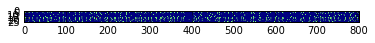

In [79]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(test[:, :, 0])

In [91]:
reload(slse)
met = slse.SLSEMetric([], 1, 13.0)

In [96]:
met.error(test, 0.2)

0


0.12949087107120041

In [88]:
test.shape

(25, 800, 1)